In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from scipy.stats import loguniform
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from catboost import CatBoostClassifier

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# New section

In [ ]:
df = pd.read_csv('/content/heart.csv') 

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


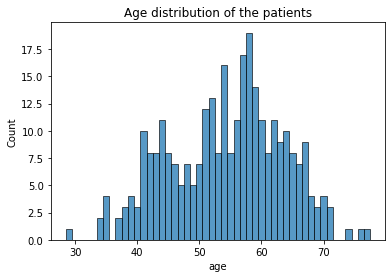

In [ ]:
sns.histplot(df.age, discrete=True)
plt.title('Age distribution of the patients')
plt.show()

In [ ]:
df.sex.value_counts().to_frame()

,sex
1,207
0,96


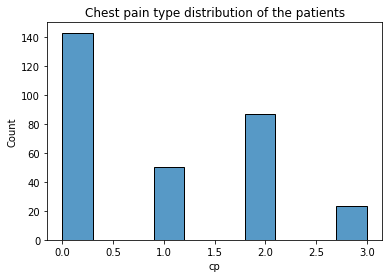

In [ ]:
sns.histplot(df.cp)
plt.title('Chest pain type distribution of the patients')
plt.show()

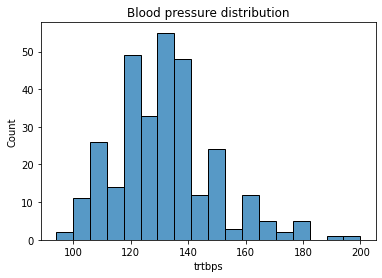

In [ ]:
sns.histplot(df.trtbps)
plt.title('Blood pressure distribution')
plt.show()

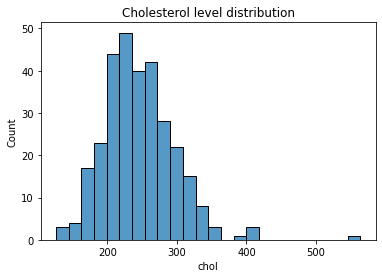

In [ ]:
sns.histplot(df.chol)
plt.title('Cholesterol level distribution')
plt.show()

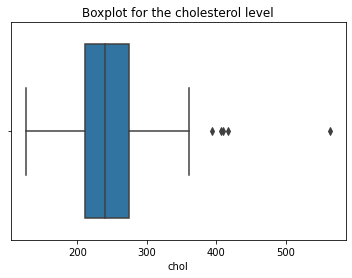

In [ ]:
sns.boxplot(data=df, x='chol')
plt.title('Boxplot for the cholesterol level')
plt.show()

In [ ]:
df.fbs.value_counts().to_frame()

,fbs
0,258
1,45


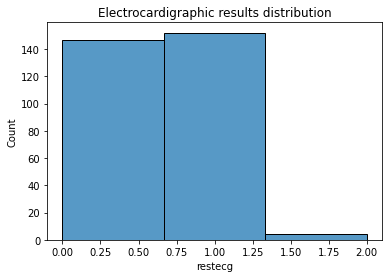

In [ ]:
sns.histplot(df.restecg, bins=3)
plt.title('Electrocardigraphic results distribution')
plt.show()

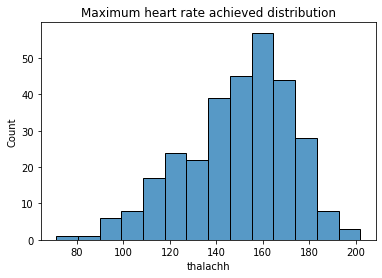

In [ ]:
sns.histplot(df.thalachh)
plt.title('Maximum heart rate achieved distribution')
plt.show()

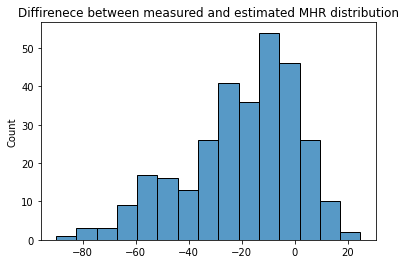

In [ ]:
sns.histplot(df.thalachh - (208 - (0.7 * df.age)))
plt.title('Diffirenece between measured and estimated MHR distribution')
plt.show()

In [ ]:
df.exng.value_counts().to_frame()

,exng
0,204
1,99


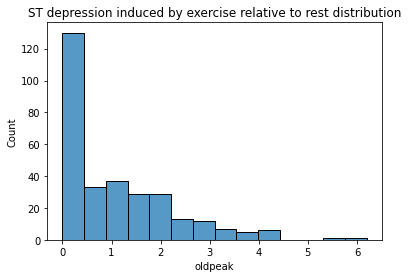

In [ ]:
sns.histplot(df.oldpeak)
plt.title('ST depression induced by exercise relative to rest distribution')
plt.show()

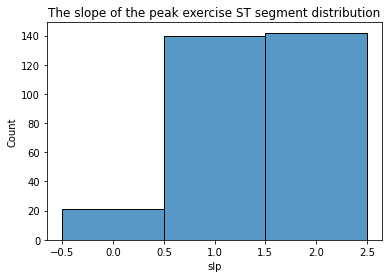

In [ ]:
sns.histplot(df.slp, discrete=True)
plt.title('The slope of the peak exercise ST segment distribution')
plt.show()

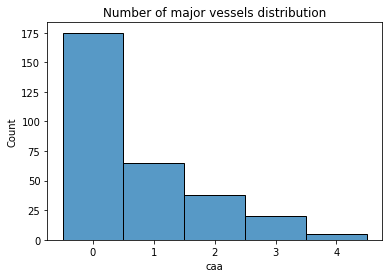

In [ ]:
sns.histplot(df.caa, discrete=True)
plt.title('Number of major vessels distribution')
plt.show()

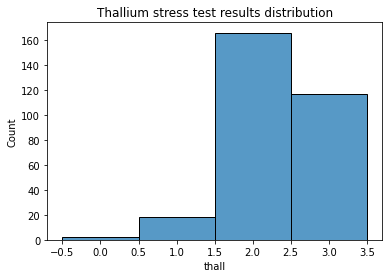

In [ ]:
sns.histplot(df.thall, discrete=True)
plt.title('Thallium stress test results distribution')
plt.show()

In [ ]:
df.query('thall == 0')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


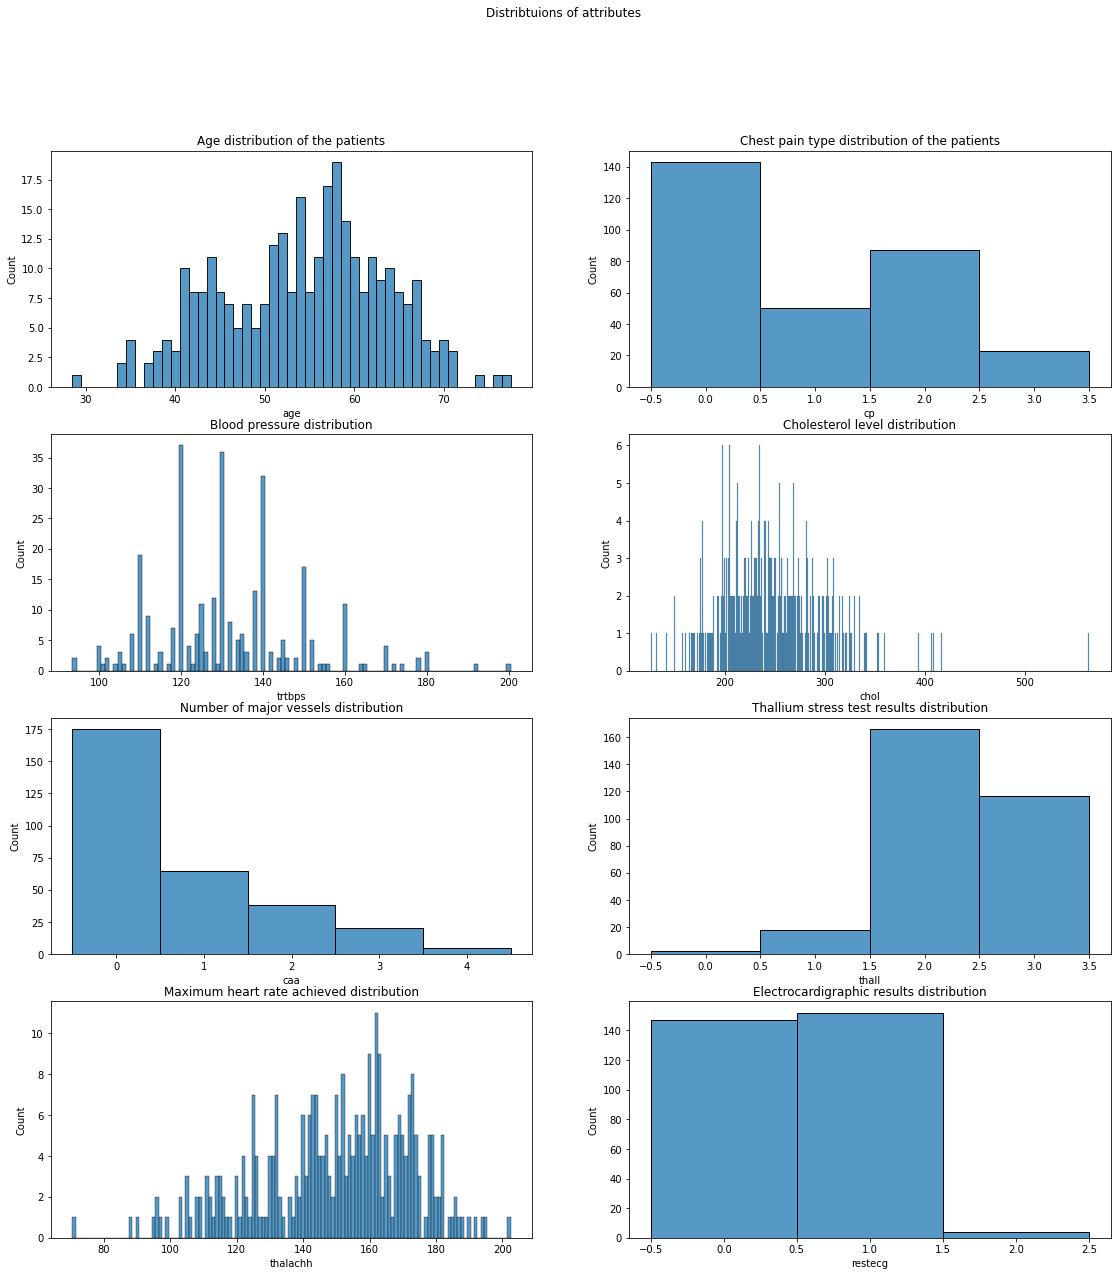

In [ ]:
_, axes = plt.subplots(4, 2, figsize=(19,20))
# sns.kdeplot(data=df, x='age', hue='output', ax=axes[0, 0])
# axes[0, 0].set_title('Age distribution ')

sns.histplot(df.age, discrete=True,ax=axes[0, 0])
axes[0, 0].set_title('Age distribution of the patients')
sns.histplot(df.cp, discrete=True,ax=axes[0, 1])
axes[0, 1].set_title('Chest pain type distribution of the patients')
sns.histplot(df.trtbps, discrete=True,ax=axes[1, 0])
axes[1, 0].set_title('Blood pressure distribution')
sns.histplot(df.chol, discrete=True,ax=axes[1, 1])
axes[1, 1].set_title('Cholesterol level distribution')
sns.histplot(df.caa, discrete=True,ax=axes[2, 0])
axes[2, 0].set_title('Number of major vessels distribution')
sns.histplot(df.thall, discrete=True,ax=axes[2, 1])
axes[2, 1].set_title('Thallium stress test results distribution')
sns.histplot(df.thalachh, discrete=True,ax=axes[3, 0])
axes[3, 0].set_title('Maximum heart rate achieved distribution')
sns.histplot(df.restecg, discrete=True,ax=axes[3, 1])
axes[3, 1].set_title('Electrocardigraphic results distribution')
plt.suptitle('Distribtuions of attributes')
plt.show()

In [ ]:
df['thall'] = df['thall'].replace({0 : np.nan})

In [ ]:
imputer = KNNImputer()
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df['thall'] = df['thall'].round()

In [ ]:
df.output.value_counts().to_frame()

,output
1.0,165
0.0,138


In [ ]:
df.output.value_counts(normalize=True).to_frame()

,output
1.0,0.544554
0.0,0.455446


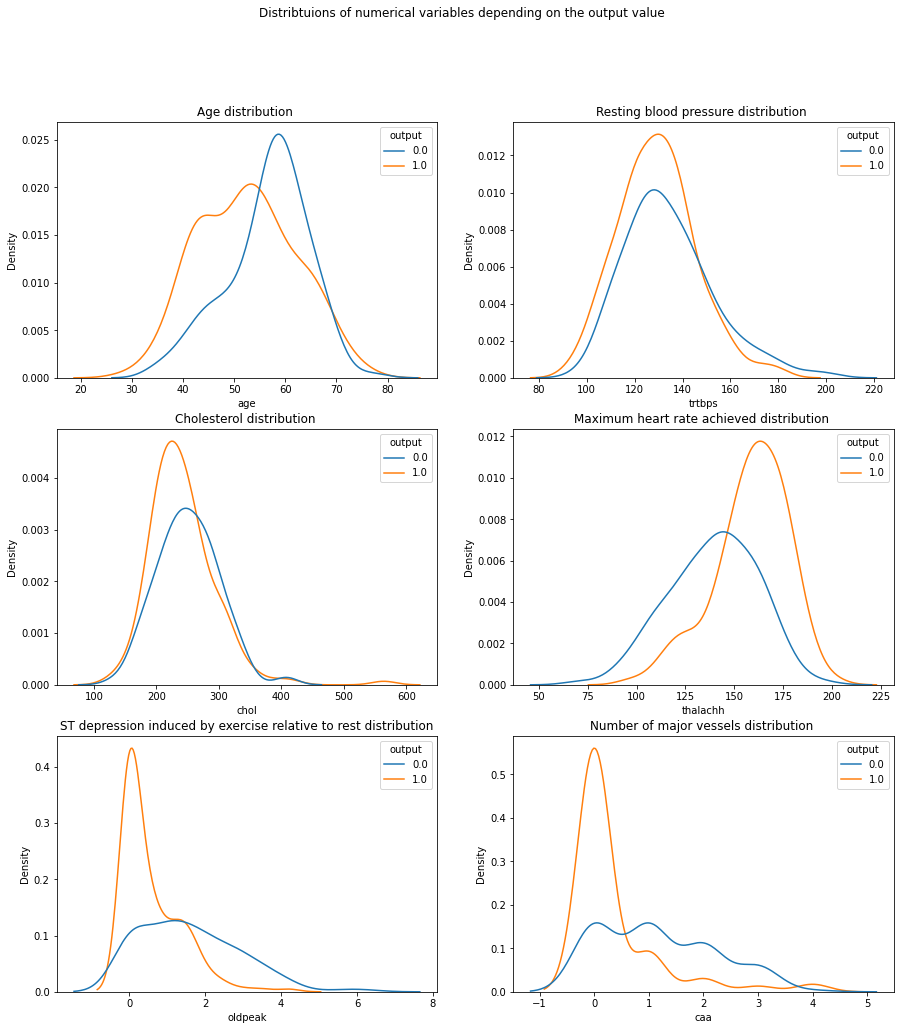

In [ ]:
_, axes = plt.subplots(3, 2, figsize=(15,16))
sns.kdeplot(data=df, x='age', hue='output', ax=axes[0, 0])
axes[0, 0].set_title('Age distribution ')
sns.kdeplot(data=df, x='trtbps', hue='output', ax=axes[0, 1])
axes[0, 1].set_title('Resting blood pressure distribution ')
sns.kdeplot(data=df, x='chol', hue='output', ax=axes[1, 0])
axes[1, 0].set_title('Cholesterol distribution ')
sns.kdeplot(data=df, x='thalachh', hue='output', ax=axes[1, 1])
axes[1, 1].set_title('Maximum heart rate achieved distribution ')  
sns.kdeplot(data=df, x='oldpeak', hue='output', ax=axes[2, 0])
axes[2, 0].set_title('ST depression induced by exercise relative to rest distribution')
sns.kdeplot(data=df, x='caa', hue='output', ax=axes[2, 1])
axes[2, 1].set_title('Number of major vessels distribution ')
plt.suptitle('Distribtuions of numerical variables depending on the output value')
plt.show()

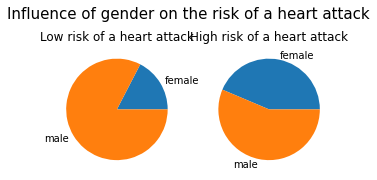

In [ ]:
_, axes = plt.subplots(1, 2, figsize=(5,3))

axes[0].pie(df.query('output == 0').groupby('sex')['sex'].count(), labels=['female', 'male'])
axes[0].set_title('Low risk of a heart attack')
axes[1].pie(df.query('output == 1').groupby('sex')['sex'].count(), labels=['female', 'male'])
axes[1].set_title('High risk of a heart attack')
plt.suptitle('Influence of gender on the risk of a heart attack', fontsize=15)
plt.show()

In [ ]:
df.groupby('output', as_index=False)['sex'].mean()

,output,sex
0,0.0,0.826087
1,1.0,0.563636


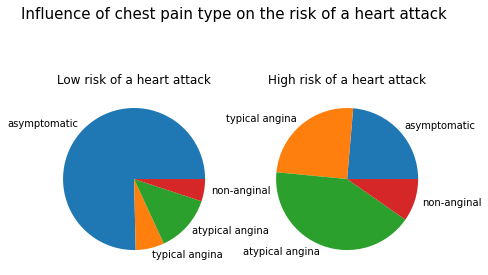

In [ ]:
_, axes = plt.subplots(1, 2, figsize=(7,5)) 

labels = ['asymptomatic', 'typical angina', 'atypical angina', 'non-anginal']

axes[0].pie(df.query('output == 0').groupby('cp')['cp'].count(), labels=labels)
axes[0].set_title('Low risk of a heart attack')
axes[1].pie(df.query('output == 1').groupby('cp')['cp'].count(), labels=labels)
axes[1].set_title('High risk of a heart attack')
plt.suptitle('Influence of chest pain type on the risk of a heart attack', fontsize=15)
plt.show()

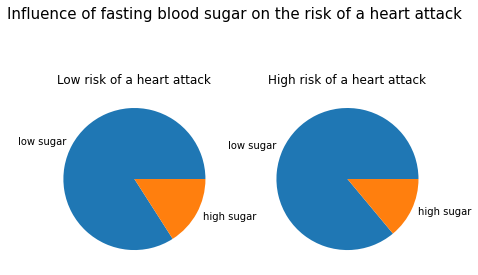

In [ ]:
_, axes = plt.subplots(1, 2, figsize=(7,5))
labels = ['low sugar', 'high sugar']

axes[0].pie(df.query('output == 0').groupby('fbs')['fbs'].count(), labels=labels)
axes[0].set_title('Low risk of a heart attack')
axes[1].pie(df.query('output == 1').groupby('fbs')['fbs'].count(), labels=labels)
axes[1].set_title('High risk of a heart attack')
plt.suptitle('Influence of fasting blood sugar on the risk of a heart attack', fontsize=15)
plt.show()

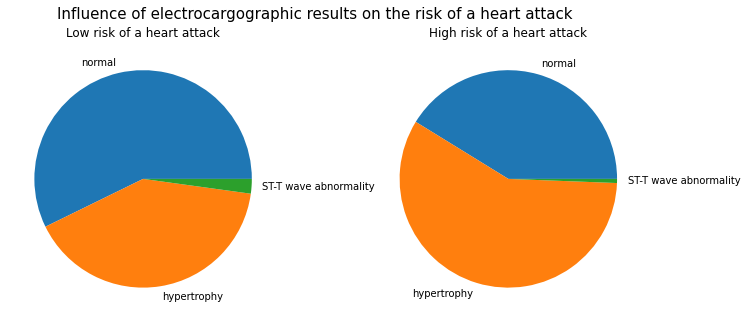

In [ ]:
_, axes = plt.subplots(1, 2, figsize=(12,5)) 

labels = ['normal', 'hypertrophy', 'ST-T wave abnormality']

axes[0].pie(df.query('output == 0').groupby('restecg')['restecg'].count(), labels=labels)
axes[0].set_title('Low risk of a heart attack')
axes[1].pie(df.query('output == 1').groupby('restecg')['restecg'].count(), labels=labels)
axes[1].set_title('High risk of a heart attack')
plt.suptitle('Influence of electrocargographic results on the risk of a heart attack', fontsize=15)
plt.show()

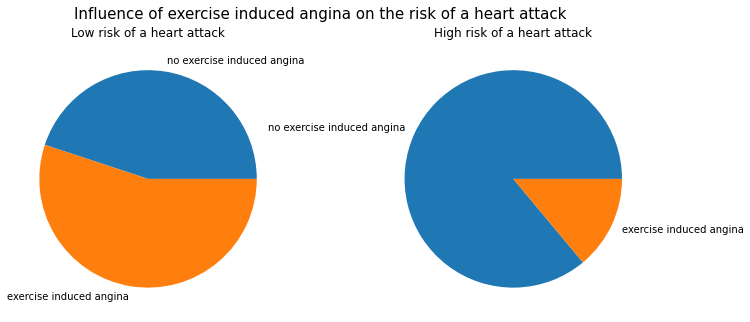

In [ ]:
_, axes = plt.subplots(1, 2, figsize=(12,5))
labels = ['no exercise induced angina', 'exercise induced angina']

axes[0].pie(df.query('output == 0').groupby('exng')['exng'].count(), labels=labels)
axes[0].set_title('Low risk of a heart attack')
axes[1].pie(df.query('output == 1').groupby('exng')['exng'].count(), labels=labels)
axes[1].set_title('High risk of a heart attack')
plt.suptitle('Influence of exercise induced angina on the risk of a heart attack', fontsize=15)
plt.show()

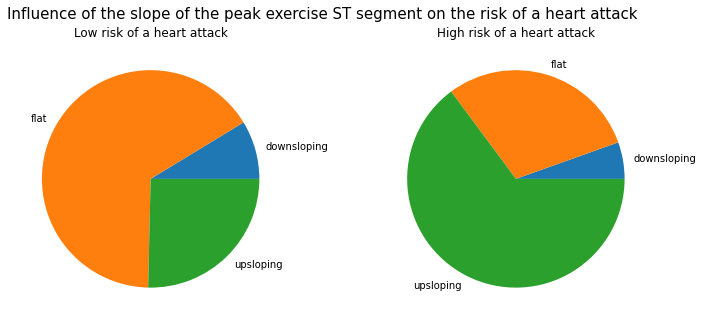

In [ ]:
_, axes = plt.subplots(1, 2, figsize=(12,5))
labels = ['downsloping', 'flat', 'upsloping']

axes[0].pie(df.query('output == 0').groupby('slp')['slp'].count(), labels=labels)
axes[0].set_title('Low risk of a heart attack')
axes[1].pie(df.query('output == 1').groupby('slp')['slp'].count(), labels=labels)
axes[1].set_title('High risk of a heart attack')
plt.suptitle('Influence of the slope of the peak exercise ST segment on the risk of a heart attack', fontsize=15)
plt.show()

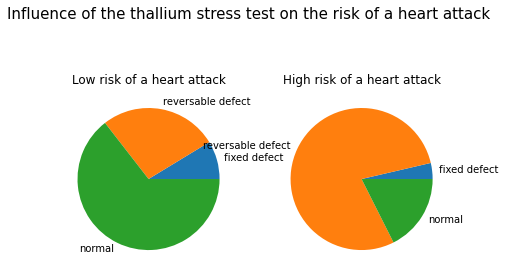

In [ ]:
_, axes = plt.subplots(1, 2, figsize=(7,5))
labels = ['fixed defect', 'reversable defect', 'normal']

axes[0].pie(df.query('output == 0').groupby('thall')['thall'].count(), labels=labels)
axes[0].set_title('Low risk of a heart attack')
axes[1].pie(df.query('output == 1').groupby('thall')['thall'].count(), labels=labels)
axes[1].set_title('High risk of a heart attack')
plt.suptitle('Influence of the thallium stress test on the risk of a heart attack', fontsize=15)
plt.show()

In [ ]:
df['thall'] = df['thall'].map({3 : 0, 1 : 2, 2 : 1})

In [ ]:
df.query('cp == 0 and restecg == 0 and exng == 0 and thall == 0')['output'].value_counts()

0.0    13
Name: output, dtype: int64

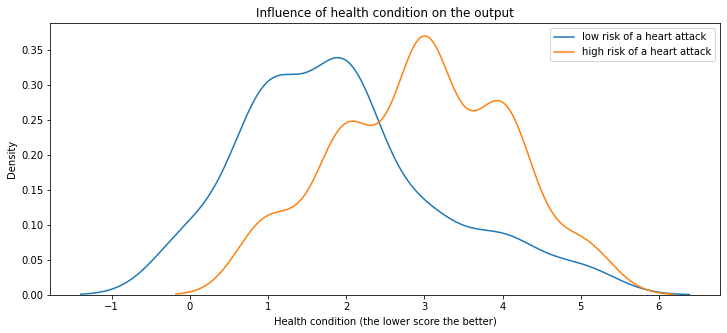

In [ ]:
plt.figure(figsize=(12,5))
df_0 = df.query('output == 0')
df_1 = df.query('output == 1')
sns.kdeplot(df_0.cp + df_0.restecg + df_0.exng + df_0.thall, label='low risk of a heart attack')
sns.kdeplot(df_1.cp + df_1.restecg + df_1.exng + df_1.thall, label='high risk of a heart attack')
plt.title('Influence of health condition on the output')
plt.xlabel('Health condition (the lower score the better)')
plt.legend()
plt.show()

In [ ]:
df_new = df.copy()

In [ ]:
rf_classifier = RandomForestClassifier(max_depth=8,
                                       n_estimators=100,
                                       random_state=42)
rf_classifier.fit(df.drop('output', axis=1), df['output'])

RandomForestClassifier(max_depth=8, random_state=42)

In [ ]:
importance = pd.concat([pd.Series(df.columns[:-1]), 
                        pd.Series(rf_classifier.feature_importances_)], axis=1)
importance.columns = ['feature', 'importance']
importance = importance.sort_values(by='importance', ascending=False)
importance

,feature,importance
2,cp,0.143875
7,thalachh,0.125165
12,thall,0.109902
11,caa,0.109500
9,oldpeak,0.106870
0,age,0.081869
4,chol,0.073372
3,trtbps,0.072702
8,exng,0.059275
10,slp,0.051713


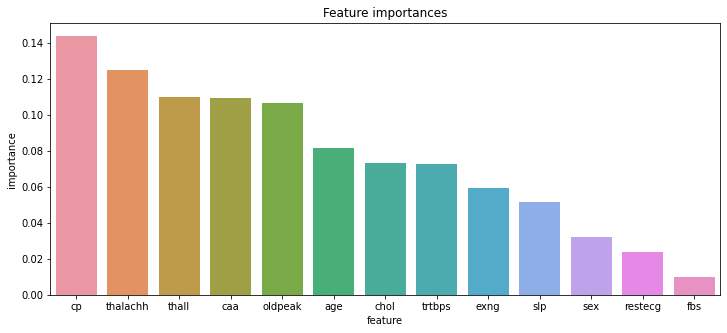

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(data=importance, x='feature', y='importance')
plt.title('Feature importances')
plt.show()

In [ ]:
df_new = df_new.drop('fbs', axis=1)

In [ ]:
df_new['mhr_estimation'] = 208 - 0.7 * df_new['age']

In [ ]:
df_new['blood_pres_cat'] = df_new['trtbps'].apply(lambda x: 0 if x < 120 else (1 if x < 140 else 2))

In [ ]:
df_new['blood_pres_cat'].value_counts().to_frame()

,blood_pres_cat
1,146
2,97
0,60


In [ ]:
df_new['cholesterol_cat'] = df_new['chol'].apply(lambda x: 0 if x < 200 else (1 if x < 240 else 2))

In [ ]:
df_new['cholesterol_cat'].value_counts().to_frame()

,cholesterol_cat
2,155
1,98
0,50


In [ ]:
df_new['pres_chol_sum_cat'] = df_new['blood_pres_cat'] + df_new['cholesterol_cat']

In [ ]:
df_new['pres_chol_sum_cat'].value_counts().to_frame()

,pres_chol_sum_cat
3,109
2,84
4,52
1,45
0,13


In [ ]:
df_new['cat_sum'] = df_new['cp'] + df_new['restecg'] + df_new['exng'] + df_new['thall']

In [ ]:
df_new['cat_sum'].value_counts().to_frame()

,cat_sum
2.0,85
3.0,73
1.0,60
4.0,54
5.0,18
0.0,13


In [ ]:
len(df_new.columns) - len(df.columns)

4

In [ ]:
df_new.head()

,age,sex,cp,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,mhr_estimation,blood_pres_cat,cholesterol_cat,pres_chol_sum_cat,cat_sum
0,63.0,1.0,3.0,145.0,233.0,0.0,150.0,0.0,2.3,0.0,0.0,2,1.0,163.9,2,1,3,5.0
1,37.0,1.0,2.0,130.0,250.0,1.0,187.0,0.0,3.5,0.0,0.0,1,1.0,182.1,1,2,3,4.0
2,41.0,0.0,1.0,130.0,204.0,0.0,172.0,0.0,1.4,2.0,0.0,1,1.0,179.3,1,1,2,2.0
3,56.0,1.0,1.0,120.0,236.0,1.0,178.0,0.0,0.8,2.0,0.0,1,1.0,168.8,1,1,2,3.0
4,57.0,0.0,0.0,120.0,354.0,1.0,163.0,1.0,0.6,2.0,0.0,1,1.0,168.1,1,2,3,3.0


In [ ]:
cross_val_score(
    estimator=RandomForestClassifier(max_depth=8,
                                     n_estimators=100,
                                     random_state=42),
    X=df.drop('output', axis=1),
    y=df['output'],
    scoring='f1',
    cv=5
).mean()

0.8495548242607066

In [ ]:
cross_val_score(
    estimator=RandomForestClassifier(max_depth=8,
                                     n_estimators=100,
                                     random_state=42),
    X=df_new.drop('output', axis=1),
    y=df_new['output'],
    scoring='f1',
    cv=5
).mean()

0.8585580788082277

In [ ]:
num_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa', 'mhr_estimation']
cat_features = ['sex', 'cp', 'restecg', 'exng', 'slp', 'thall', 'blood_pres_cat', 'cholesterol_cat', 'pres_chol_sum_cat', 'cat_sum']

In [ ]:
features = df_new.drop('output', axis=1)
target = df_new['output'].astype('int')

In [ ]:
print(features.shape)
print(target.shape)

(303, 17)
(303,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42) 

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 17)
(61, 17)
(242,)
(61,)


In [ ]:
X_train[cat_features] = X_train[cat_features].astype('str')
X_test[cat_features] = X_test[cat_features].astype('str')

In [ ]:
X_train.head()

,age,sex,cp,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,caa,thall,mhr_estimation,blood_pres_cat,cholesterol_cat,pres_chol_sum_cat,cat_sum
132,42.0,1.0,1.0,120.0,295.0,1.0,162.0,0.0,0.0,2.0,0.0,1,178.6,1,2,3,3.0
202,58.0,1.0,0.0,150.0,270.0,0.0,111.0,1.0,0.8,2.0,0.0,0,167.4,2,2,4,1.0
196,46.0,1.0,2.0,150.0,231.0,1.0,147.0,0.0,3.6,1.0,0.0,1,175.8,2,1,3,4.0
75,55.0,0.0,1.0,135.0,250.0,0.0,161.0,0.0,1.4,1.0,0.0,1,169.5,1,2,3,2.0
176,60.0,1.0,0.0,117.0,230.0,1.0,160.0,1.0,1.4,2.0,2.0,0,166.0,0,1,1,2.0


In [ ]:
X_test.head()

,age,sex,cp,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,caa,thall,mhr_estimation,blood_pres_cat,cholesterol_cat,pres_chol_sum_cat,cat_sum
179,57.0,1.0,0.0,150.0,276.0,0.0,112.0,1.0,0.6,1.0,1.0,2,168.1,2,2,4,3.0
228,59.0,1.0,3.0,170.0,288.0,0.0,159.0,0.0,0.2,1.0,0.0,0,166.7,2,2,4,3.0
111,57.0,1.0,2.0,150.0,126.0,1.0,173.0,0.0,0.2,2.0,1.0,0,168.1,2,0,2,3.0
246,56.0,0.0,0.0,134.0,409.0,0.0,150.0,1.0,1.9,1.0,2.0,0,168.8,1,2,3,1.0
60,71.0,0.0,2.0,110.0,265.0,0.0,130.0,0.0,0.0,2.0,1.0,1,158.3,0,2,2,3.0


In [ ]:
features_ohe = pd.get_dummies(features, drop_first=True, columns=cat_features)

In [ ]:
features_ohe.head()

,age,trtbps,chol,thalachh,oldpeak,caa,mhr_estimation,sex_1.0,cp_1.0,cp_2.0,...,cholesterol_cat_2,pres_chol_sum_cat_1,pres_chol_sum_cat_2,pres_chol_sum_cat_3,pres_chol_sum_cat_4,cat_sum_1.0,cat_sum_2.0,cat_sum_3.0,cat_sum_4.0,cat_sum_5.0
0,63.0,145.0,233.0,150.0,2.3,0.0,163.9,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,37.0,130.0,250.0,187.0,3.5,0.0,182.1,1,0,1,...,1,0,0,1,0,0,0,0,1,0
2,41.0,130.0,204.0,172.0,1.4,0.0,179.3,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,56.0,120.0,236.0,178.0,0.8,0.0,168.8,1,1,0,...,0,0,1,0,0,0,0,1,0,0
4,57.0,120.0,354.0,163.0,0.6,0.0,168.1,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features_ohe, 
                                                                            target, 
                                                                            test_size=0.2,
                                                                            random_state=42)

In [ ]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(242, 31)
(61, 31)
(242,)
(61,)


In [ ]:
scaler = StandardScaler()
features_train[num_features] = scaler.fit_transform(features_train[num_features])
features_test[num_features] = scaler.transform(features_test[num_features])

In [ ]:
features_train.head()

,age,trtbps,chol,thalachh,oldpeak,caa,mhr_estimation,sex_1.0,cp_1.0,cp_2.0,...,cholesterol_cat_2,pres_chol_sum_cat_1,pres_chol_sum_cat_2,pres_chol_sum_cat_3,pres_chol_sum_cat_4,cat_sum_1.0,cat_sum_2.0,cat_sum_3.0,cat_sum_4.0,cat_sum_5.0
132,-1.356798,-0.616856,0.914034,0.532781,-0.920864,-0.689701,1.356798,1,1,0,...,1,0,0,1,0,0,0,1,0,0
202,0.385086,1.169491,0.439527,-1.753582,-0.193787,-0.689701,-0.385086,1,0,0,...,1,0,0,0,1,1,0,0,0,0
196,-0.921327,1.169491,-0.300704,-0.139679,2.350982,-0.689701,0.921327,1,0,1,...,0,0,0,1,0,0,0,0,1,0
75,0.058483,0.276318,0.059921,0.487950,0.351521,-0.689701,-0.058483,0,1,0,...,1,0,0,1,0,0,1,0,0,0
176,0.602822,-0.795490,-0.319684,0.443119,0.351521,1.333421,-0.602822,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
features_test.head()

,age,trtbps,chol,thalachh,oldpeak,caa,mhr_estimation,sex_1.0,cp_1.0,cp_2.0,...,cholesterol_cat_2,pres_chol_sum_cat_1,pres_chol_sum_cat_2,pres_chol_sum_cat_3,pres_chol_sum_cat_4,cat_sum_1.0,cat_sum_2.0,cat_sum_3.0,cat_sum_4.0,cat_sum_5.0
179,0.276218,1.169491,0.553408,-1.708752,-0.375556,0.321860,-0.276218,1,0,0,...,1,0,0,0,1,0,0,1,0,0
228,0.493954,2.360389,0.781172,0.398289,-0.739095,-0.689701,-0.493954,1,0,0,...,1,0,0,0,1,0,0,1,0,0
111,0.276218,1.169491,-2.293633,1.025918,-0.739095,0.321860,-0.276218,1,0,1,...,0,0,1,0,0,0,0,1,0,0
246,0.167350,0.216773,3.077785,-0.005187,0.805944,1.333421,-0.167350,0,0,0,...,1,0,0,1,0,1,0,0,0,0
60,1.800367,-1.212304,0.344625,-0.901800,-0.920864,0.321860,-1.800367,0,0,1,...,1,0,1,0,0,0,0,1,0,0


In [ ]:
parameters_svc = dict(
    C=loguniform(0.0001, 20),
    kernel=['rbf', 'poly'],
    gamma=loguniform(0.0001, 20)
)

In [ ]:
%%time
random_search_svc = RandomizedSearchCV(
    estimator=SVC(probability=True, random_state=42),
    param_distributions=parameters_svc,
    n_iter=75,
    scoring='f1',
    cv=5,
    random_state=42
)
random_search_svc.fit(features_train, target_train)

CPU times: user 11.8 s, sys: 39.5 ms, total: 11.8 s
Wall time: 15.4 s


In [ ]:
svc_cv_f1 = random_search_svc.best_score_
svc_cv_f1

0.8325186005766767

In [ ]:
random_search_svc.best_params_

{'C': 1.9551916197232408, 'gamma': 0.007051619289571366, 'kernel': 'rbf'}

In [ ]:
best_svc = random_search_svc.best_estimator_

In [ ]:
parameters_rf = dict(
    n_estimators=range(5, 1000),
    max_depth=range(4, 30),
    min_samples_split=range(2, 10),
    min_samples_leaf=range(1, 10),
    max_features=range(2, features_train.shape[1])
)

In [ ]:
%%time
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=parameters_rf,
    n_iter=75,
    scoring='f1',
    cv=5,
    random_state=42,
    verbose=1
)
random_search_rf.fit(features_train, target_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
CPU times: user 4min 39s, sys: 2.05 s, total: 4min 41s
Wall time: 4min 54s


In [ ]:
rf_cv_f1 = random_search_rf.best_score_
rf_cv_f1

0.8529167264258541

In [ ]:
random_search_rf.best_params_

{'max_depth': 6,
 'max_features': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 98}

In [ ]:
best_rf = random_search_rf.best_estimator_

In [ ]:
parameters_boost=dict(
    learning_rate=loguniform(0.0001, 0.5),
    iterations=range(10, 500),
    depth=range(3, 12),
    l2_leaf_reg=uniform(1, 20),
    random_strength=loguniform(0.001, 1000)
)

In [ ]:
%%time
random_search_boost = RandomizedSearchCV(
    estimator=CatBoostClassifier(verbose=False, cat_features=cat_features, eval_metric='F1'),
    param_distributions=parameters_boost,
    n_iter=25,
    scoring='f1',
    cv=5,
    random_state=42,
    verbose=1
)
random_search_boost.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
CPU times: user 8min 46s, sys: 1min 25s, total: 10min 12s
Wall time: 5min 25s


In [ ]:
random_search_boost.best_params_

{'depth': 6,
 'iterations': 279,
 'l2_leaf_reg': 15.545439917128418,
 'learning_rate': 0.0016138549885357876,
 'random_strength': 2.646450933886621}

In [ ]:
catboost_cv_f1 = random_search_boost.best_score_
catboost_cv_f1

0.8573662675091688

In [ ]:
best_catboost = random_search_boost.best_estimator_

In [ ]:
results_cv = pd.DataFrame([
    ['svm', svc_cv_f1],
    ['random forest', rf_cv_f1],
    ['catboost', catboost_cv_f1]],
    columns=['model', 'f1-score on cross-validation']
)

In [ ]:
results_cv

,model,f1-score on cross-validation
0,svm,0.832519
1,random forest,0.852917
2,catboost,0.857366


In [ ]:
svc_pred = best_svc.predict(features_test)
rf_pred = best_rf.predict(features_test)
catboost_pred = best_catboost.predict(X_test)

In [ ]:
svc_pred_prob = best_svc.predict_proba(features_test)[:, 1]
rf_pred_prob = best_rf.predict_proba(features_test)[:, 1]
catboost_pred_prob = best_catboost.predict_proba(X_test)[:, 1]

In [ ]:
f1_svc_test = f1_score(target_test, svc_pred)
f1_svc_test

0.8787878787878787

In [ ]:
f1_rf_test = f1_score(target_test, rf_pred)
f1_rf_test

0.8787878787878787

In [ ]:
f1_catboost_test = f1_score(y_test, catboost_pred)
f1_catboost_test

0.8923076923076922

In [ ]:
results_cv['f1-score on the test set'] = pd.Series([f1_svc_test, f1_rf_test, f1_catboost_test])

In [ ]:
results_cv

,model,f1-score on cross-validation,f1-score on the test set
0,svm,0.832519,0.878788
1,random forest,0.852917,0.878788
2,catboost,0.857366,0.892308


In [ ]:
fpr_svc, tpr_svc, thresh_svc = roc_curve(target_test, svc_pred_prob)
fpr_rf, tpr_rf, thresh_rf = roc_curve(target_test, rf_pred_prob)
fpr_catboost, tpr_catboost, thresh_catboost = roc_curve(y_test, catboost_pred_prob)

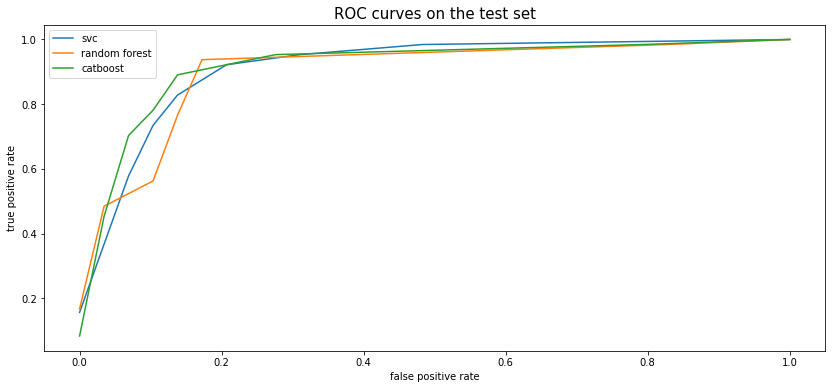

In [ ]:
plt.figure(figsize=(14,6))
sns.lineplot(x=fpr_svc, y=tpr_svc, ci=None, label='svc')
sns.lineplot(x=fpr_rf, y=tpr_rf, ci=None, label='random forest')
sns.lineplot(x=fpr_catboost, y=tpr_catboost, ci=None, label='catboost')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curves on the test set', fontsize=15)
plt.legend()
plt.show()

In [ ]:
roc_auc_svc_test = roc_auc_score(target_test, svc_pred_prob)
roc_auc_svc_test

0.9245689655172413

In [ ]:
roc_auc_rf_test = roc_auc_score(target_test, rf_pred_prob)
roc_auc_rf_test

0.9105603448275862

In [ ]:
roc_auc_catboost_test = roc_auc_score(y_test, catboost_pred_prob)
roc_auc_catboost_test

0.9224137931034483

In [ ]:
results_cv['roc_auc on the test set'] = pd.Series([roc_auc_svc_test, roc_auc_rf_test, roc_auc_catboost_test])

In [ ]:
results_cv

,model,f1-score on cross-validation,f1-score on the test set,roc_auc on the test set
0,svm,0.832519,0.878788,0.924569
1,random forest,0.852917,0.878788,0.910560
2,catboost,0.857366,0.892308,0.922414


In [ ]:
final_importance = pd.concat([pd.Series(X_train.columns), 
                              pd.Series(best_catboost.feature_importances_)], axis=1)
final_importance.columns = ['feature', 'importance']
final_importance = final_importance.sort_values(by='importance', ascending=False)
final_importance

,feature,importance
11,thall,31.847864
2,cp,19.067052
10,caa,13.969756
9,slp,7.332575
7,exng,7.090327
16,cat_sum,4.624429
8,oldpeak,3.624839
5,restecg,2.029442
14,cholesterol_cat,1.947833
13,blood_pres_cat,1.631036


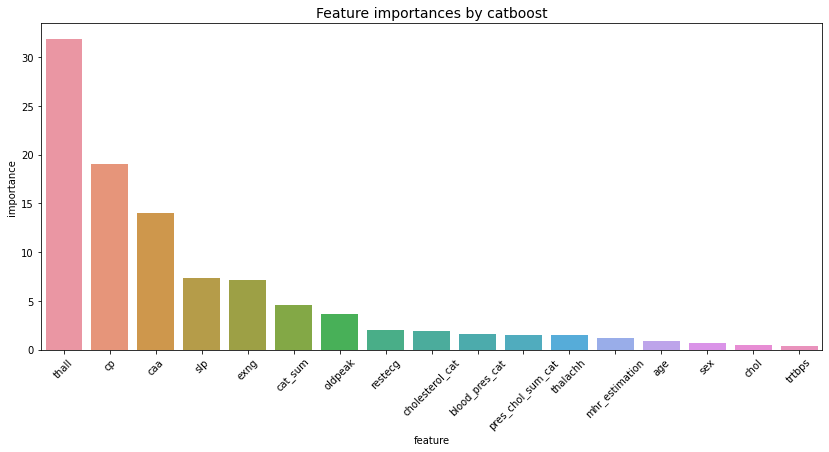

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(data=final_importance, x='feature', y='importance')
plt.xticks(rotation=45)
plt.title('Feature importances by catboost', fontsize=14)
plt.show()

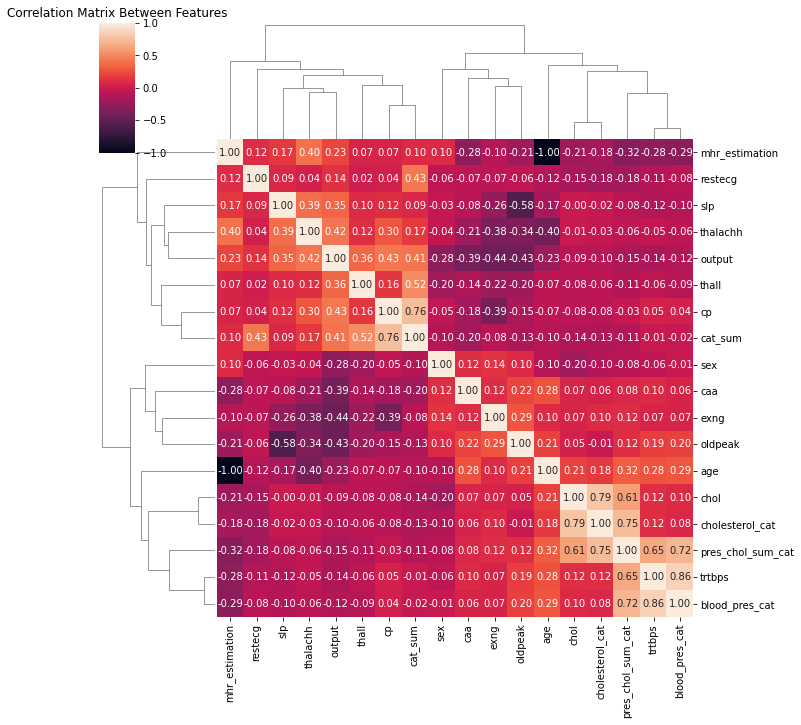

In [ ]:
# Correlation Matrix
corr_matrix = df_new.corr()
sns.clustermap(corr_matrix,annot=True,fmt=".2f")
plt.title("Correlation Matrix Between Features")
plt.show()

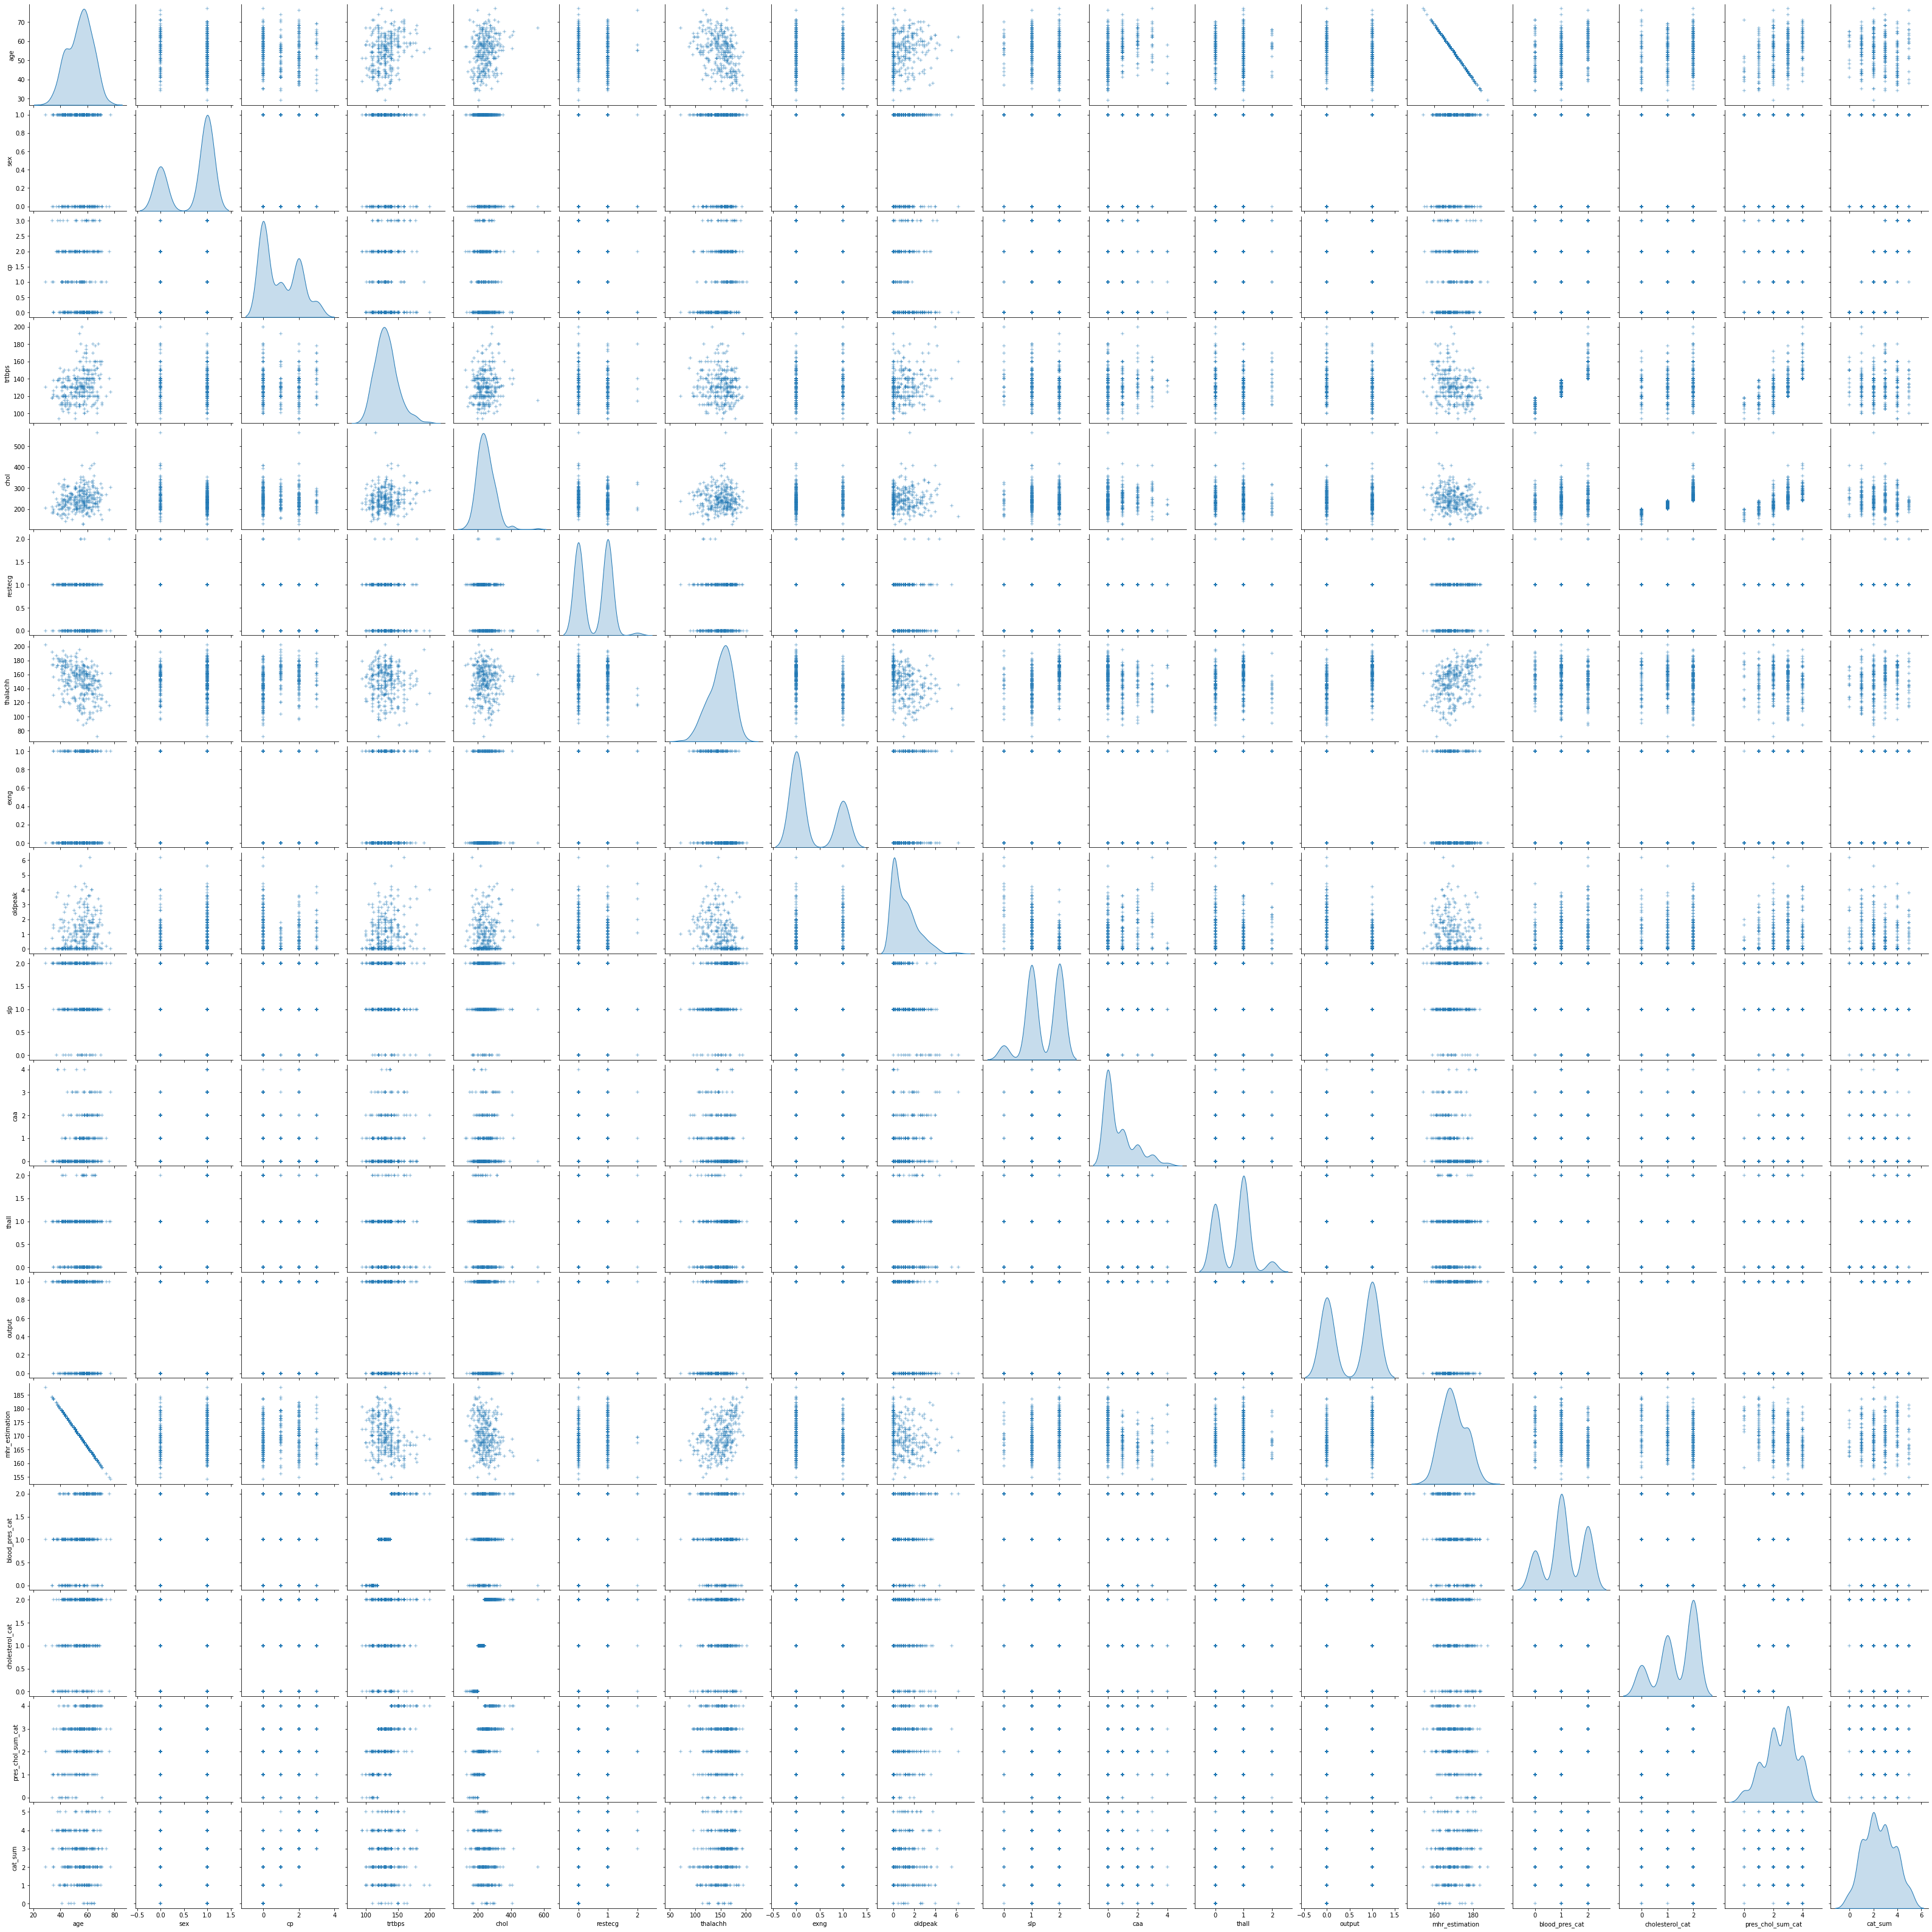

In [ ]:
sns.pairplot(df_new,diag_kind="kde",markers="+")

In [ ]:
from sklearn import tree
dtc =tree.DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

age -  0.03300888716640383
sex -  0.03087569009940701
cp -  0.22526269802947727
trtbps -  0.027676323738287517
chol -  0.11139078667532834
restecg -  0.01251983168931503
thalachh -  0.04924816772275463
exng -  0.07542094310859741
oldpeak -  0.10074824170032508
slp -  0.03996229104872273
caa -  0.12543308335980308
thall -  0.009158383930969533
mhr_estimation -  0.02535582074452185
blood_pres_cat -  0.02962208543484995
cholesterol_cat -  0.01947529373893449
pres_chol_sum_cat -  0.0
cat_sum -  0.08484147181230225


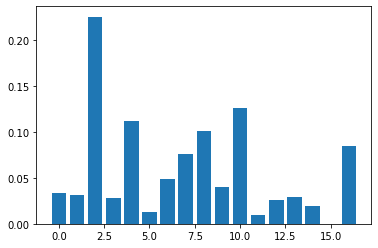

In [ ]:
importance = dtc.feature_importances_
for i,v in enumerate(importance):
    print(X_train.columns[int(i)],"- ",v)
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
dtc.score(X_test,y_test)

0.8524590163934426

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.8852459016393442


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
Model = KNeighborsClassifier(n_neighbors=30)
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.7213114754098361


In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test) 
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.8688524590163934


In [ ]:
#SVC
from sklearn.svm import SVC

Model = SVC()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.7049180327868853


In [ ]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
Model=GradientBoostingClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))


accuracy is  0.8360655737704918


In [ ]:
#AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
Model=AdaBoostClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

accuracy is  0.7377049180327869


In [ ]:
#BaggingClassifier
from sklearn.ensemble import BaggingClassifier
Model=BaggingClassifier()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)

#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

accuracy is  0.7868852459016393


In [ ]:
#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Model=LinearDiscriminantAnalysis()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

accuracy is  0.8852459016393442


In [ ]:
#Quadratic Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
Model=QuadraticDiscriminantAnalysis()
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
#Accuracy Score
print('accuracy is ',accuracy_score(y_pred,y_test))

accuracy is  0.5081967213114754


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# New section

In [ ]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
Model = BernoulliNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.8360655737704918
